In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv('C:/Users/14760/Desktop/cleaned_data.csv')
#导入数据集

In [3]:
features=data.drop(['Ms','Hc','Hc_log'],axis=1)
target_Ms=data['Ms']
target_Hc=data['Hc_log']
target=np.array([target_Ms,target_Hc]).T

#划分目标变量

In [4]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
#划分数据集

In [5]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.0005, epsilon=0.1)
multioutput_regressor = MultiOutputRegressor(svr_rbf)
#创建svr模型

In [6]:
multioutput_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=100, gamma=0.0005))

In [7]:
y_pred = multioutput_regressor.predict(X_test)
y_pred

array([[186.42520139,   1.77496584],
       [137.52135816,   5.6724255 ],
       [ 81.8464238 ,   5.98702004],
       [155.28456724,   4.97269742],
       [171.33228493,   1.85279962],
       [197.13572853,   2.20685768],
       [ 63.13900954,   6.59998719],
       [135.87454201,   5.77595338],
       [195.20007106,   0.85550443],
       [190.37641994,   2.65278442],
       [207.88115289,   1.69395904],
       [ 93.75479057,   3.98693314],
       [187.5441408 ,   3.05095598],
       [110.06802031,   5.72783611],
       [ 86.68563215,   6.46193475],
       [196.16125401,   2.07094233],
       [200.97624853,   2.52079574],
       [161.99793807,   1.94184541],
       [ 41.41717123,   2.91493626],
       [109.39097055,   1.8268789 ],
       [146.52082933,   5.95652229],
       [ 71.70148935,   2.89872694],
       [113.35945866,   5.46463103],
       [167.43457685,   4.55328259],
       [140.64324966,   5.16659922],
       [143.54590176,   4.19847764],
       [186.92346568,   2.8784282 ],
 

In [8]:
r2=r2_score(y_test[:,0],y_pred[:,0])
rmse=np.sqrt(mean_squared_error(y_test[:,0],y_pred[:,0]))
print(r2)
print(rmse)

0.8640167181835935
20.82199034221541


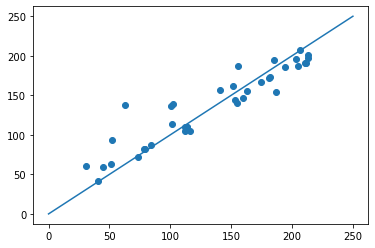

In [9]:
x=np.linspace(0,250,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,0],y_pred[:,0])
plt.show()

In [10]:
r2=r2_score(y_test[:,1],y_pred[:,1])
rmse=np.sqrt(mean_squared_error(y_test[:,1],y_pred[:,1]))
print(r2)
print(rmse)

0.6651742036136372
1.06027718993438


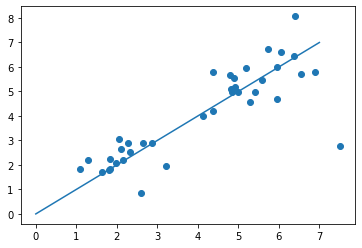

In [11]:
x=np.linspace(0,7,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,1],y_pred[:,1])
plt.show()